# Sleep Quality Score Predictor
Semester 4 ICT & Artificial Intelligence Individual Challenge 

### Author
Ellyshia Cheryl Tan

# Introduction
In this semester 4 ICT & Artifical Intelligence specialization, I am adopting the topic of sleep quality for my individual challenge. This topic was not my first topic of choice, which was predicting the future sales of fast fashion brands, which I found not feasible early in the data collection stage due to the absence of most of the data features needed to provide a relevant prediction. I then decided to change my approach towards this challenge, to first look at available datasets online, then to come up with a prediction idea. That is when I encountered the sleep quality datasets on Kaggle.

My prediction will be focused on the sleep quality score of the user, based on the input that they gave on their health and lifestyle information. The prediction, however, is limited to only predicting the sleep quality score for the evening of that day, in short, it is a daily prediction. 

I chose to do this prediction, mainly because I find the idea itself interesting, as lately I have been wondering why is it that I still do not feel rested despite getting 7 to 8 hours of sleep every night. Therefore, when I found the sleep quality dataset, I thought that it would be useful to be able to predict if one’s going to sleep well tonight, as the result may convince one to make a change to their habits and lifestyle. To add, I would also like to use the prediction for myself, not only to test the accuracy, but also to improve my sleep quality if the prediction is accurate and insightful.

Although I am keen to test the prediction independently, I must also consider the input and expectations of a stakeholder for this challenge. My stakeholder, Claudia, for this challenge is an acquaintance of mine who shares the same interest as me in the idea of predicting sleep quality. Although not an expert in the topic of sleep, she had an experience with sleep quality issues due to having had a sleep disorder, specifically insomnia (undiagnosed). For that reason, I decided that she would be a fitting stakeholder, as she can provide me with insights on what caused her to have had the sleep disorder, as well as the lifestyle and habits she changed to improve her sleep quality and get better. Additionally, her inputs would also help me empathize and design the system better to be truly useful for the users.

The end product of this challenge would be a Sleep Quality Predictor web application, with easy-to-use interface, however, it will mainly focus on the functionality and accuracy, as well as the usefulness of the prediction.


# Analytic Approach

### Target Variable
The target variable of this prediction challenge will be the `Sleep Quality`.

### Nature of the Problem
The target variable to be predicted is classified as a continuous value, therefore the algorithm that will be used is ‘Regression’.


# Data Requirements 
Through the domain understanding research that I conducted at the start of this challenge, I found that there are many internal and external factors that affect one's sleep quality, both directly and indirectly. The factors are: `Physical Pain`, `Stress Level`, `Mental Health Issues`, `Snoring`, `Sleep Disorders`, `Gender`, `Blood Pressure`, `Lighting`, `Jet Lag`, `Medications`, `Sleep Environment`, `Sleep Schedule Consistency`, `Caffeine Intake`, `Alcohol Intake`, `Smoking Status`, `Diet`, `Physical Activities Level`, and `BMI`. However, I decided to omit `Physical Pain`, `Snoring`, `Lighting`, `Jet Lag`, `Sleep Environment`, and `Medications`, as they are too broad and lack standardized measures.

### Data Characteristics
Based on the data requirements above, below is a comprehensive data characteristics that is needed for the prediction.

<img src="data_characteristics_table.png" alt="Data characteristics table" />

# Import Libraries

In [19]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import shap

print("Pandas version:", pd.__version__) # 2.2.3
print("Seaborn version:", sns.__version__) # 0.13.2
print("Seaborn version:", sklearn.__version__) # 1.6.1
print("SHAP version:", shap.__version__) # 0.46.0

Pandas version: 2.2.3
Seaborn version: 0.13.2
Seaborn version: 1.6.1
SHAP version: 0.46.0


# Data Collection
The collection of data is done by downloading the CSV files into the project folder through Kagglehub API.

## Sleep Cycle and Productivity Dataset

In [20]:
path = kagglehub.dataset_download("adilshamim8/sleep-cycle-and-productivity")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\tanel\.cache\kagglehub\datasets\adilshamim8\sleep-cycle-and-productivity\versions\1


### Data Dictionary
Below is the data dictionary of the Sleep Health and Lifestyle Dataset, based on the description of each column provided by the author on Kaggle.

In [21]:
data_dictionary = {
    "Data element": ["Date", "Person_ID", "Age", "Gender", "Sleep Start Time", "Sleep End Time", "Total Sleep Hours", "Sleep Quality", "Exercise (mins/day)", "Caffeine Intake (mg)", "Screen Time Before Bed (mins)", "Work Hours (hrs/day)", "Productivity Score", "Mood Score", "Stress Level"],
    "Description": ["The date of data collection", "Unique identifier for each individual", "Age of the person", "Male, Female, or Other", "Time when the person went to bed", "Time when the person woke up", "Total duration of sleep", "Self-reported sleep quality", "Minutes spent exercising per day", "Amount of caffeine consumed", "Time spent using screens before sleeping", "Total working hours in a day", "Self-reported productivity score", "Self-reported mood score", "Self-reported stress level"],
    "Data type": ["datetime", "integer", "integer", "string", "float", "float", "float", "integer", "integer", "integer", "integer", "float", "integer", "integer", "integer"],
    "Units": ["-", "-", "years", "-", "-", "-", "-", "-", "minutes", "mg", "minutes", "hours", "-", "-", "-"],
    "Range": ["2024-01-01 to 2024-12-31", "1000-9998", "18-59", "-", "20.00-24.00", "00.56-09.42", "4.5-9.5", "1-10", "0-89", "0-299", "0-179", "4-12", "1-10", "1-10", "1-10"],
    "Requirements and notes": ["Has to be in YYYY-MM-DD format.", "Does not accept null value.", "Does not accept null value.", "Only accepts three values: Female, Male, and Other.", "Has to be in 24-hour format.", "Has to be in 24-hour format.", "-", "Cannot be missing, as it is the target variable.", "Accepts null value.", "Accepts null value.", "Accepts null value.", "Accepts null value.", "Accepts null value.", "Accepts null value.", "Accepts null value."],
    "Source": ["Kaggle", "Kaggle", "Kaggle", "Kaggle", "Kaggle", "Kaggle", "Kaggle", "Kaggle", "Kaggle", "Kaggle", "Kaggle", "Kaggle", "Kaggle", "Kaggle", "Kaggle"]
}

dictionary = pd.DataFrame(data_dictionary)
dictionary.style

## Sleep Health and Lifestyle Dataset

In [22]:
path = kagglehub.dataset_download("uom190346a/sleep-health-and-lifestyle-dataset")
print ("Path to dataset file:", path)

Path to dataset file: C:\Users\tanel\.cache\kagglehub\datasets\uom190346a\sleep-health-and-lifestyle-dataset\versions\2


### Data Dictionary
Below is the data dictionary of the Sleep Health and Lifestyle Dataset, based on the description of each column provided by the author on Kaggle.

In [23]:
data_dictionary = {
    "Data element": ["Person ID", "Gender", "Age", "Occupation", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "BMI Category", "Blood Pressure", "Heart Rate", "Daily Steps", "Sleep Disorder"],
    "Description": ["An identifier for each individual.", "The gender of the person (Male/Female).", "The age of the person in years.", "The occupation or profession of the person.", "The number of hours the person sleeps per day.", " A subjective rating of the quality of sleep.", "The number of minutes the person engages in physical activity daily.", "A subjective rating of the stress level experienced by the person.", "The BMI category of the person", "The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure (systolic/diastolic).", "The resting heart rate of the person in beats per minute.", "The number of steps the person takes per day", "The presence or absence of a sleep disorder in the person"],
    "Data type": ["integer", "string", "integer", "string", "float", "integer", "integer", "integer", "string", "object", "integer", "integer", "string"],
    "Units": ["-", "-", "years", "-", "hours", "-", "minutes", "-", "-", "-", "bpm", "-", "-"],
    "Range": ["1-374", "-", "27-59", "-", "5.8-8.5", "4-9", "30-90", "3-8", "-", "-", "65-86", "3000-10000", "-"],
    "Requirements and notes": ["Does not accept null value.", "Only accepts two values: Male and Female.", "Does not accept null value.", "Can be missing.", "Does not accept null value.", "Cannot be missing, as it is the target variable.", "Accepts null value.", "Accepts null value.", "Can be missing", "Does not accept null value. Can be missing.", "Does not accept null value. Can be missing.", "Accepts null value.", "Only accepts three values: Insomnia, Sleep Apnea, and None."],
    "Source": ["Kaggle", "Kaggle", "Kaggle", "Kaggle", "Kaggle", "Kaggle", "Kaggle", "Kaggle", "Kaggle", "Kaggle", "Kaggle", "Kaggle", "Kaggle"]
}

dictionary = pd.DataFrame(data_dictionary)
dictionary.style

### Data Source
Both datasets that are used in this notebook are obtained through Kaggle. The 'Sleep Cycle and Productivity' dataset is a synthetically generated dataset by Adil Shamim that is designed to reflect realistic patterns based on research on sleep, exercise, caffeine intake, and productivity, provided is the source link: https://www.kaggle.com/datasets/adilshamim8/sleep-cycle-and-productivity/data. The 'Sleep Health and Lifestyle' dataset is also a synthetic dataset created by Laksika Tharmalingam for illustrative purposes, provided is the source link: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data.

# Data Provisioning

Before proceeding with using the datasets, I will check the usability of the datasets.

### Sleep Cycle and Productivity Dataset

In [24]:
df_1 = pd.read_csv("datasets/sleep_cycle_productivity.csv")
df_1.sample(10)

Date  Person_ID  Age  Gender  Sleep Start Time  Sleep End Time  \
3720  2024-07-10       2143   34   Other             20.28            3.71   
171   2024-02-18       9895   22  Female             21.05            1.80   
1298  2024-07-22       5661   51   Other             23.35            7.58   
935   2024-01-31       6643   33  Female             22.02            6.40   
3987  2024-01-17       5323   46   Other             22.67            3.18   
4324  2024-03-08       3125   35   Other             22.02            3.51   
2464  2024-06-02       9521   51  Female             22.58            6.64   
3189  2024-02-23       6936   24   Other             23.97            4.50   
2542  2024-11-01       4844   28    Male             22.30            5.65   
4895  2024-01-03       6177   44   Other             23.03            5.55   

      Total Sleep Hours  Sleep Quality  Exercise (mins/day)  \
3720               7.43              6                   84   
171                4.75              7                   34   
1298               8.23              4                   61   
935                8.38             10                   24   
3987               4.51              4                   33   
4324               5.49              7                   47   
2464               8.06              4                   28   
3189               4.54              4                   40   
2542               7.35              5                   26   
4895               6.51              1                   52   

      Caffeine Intake (mg)  Screen Time Before Bed (mins)  \
3720                   153                            169   
171                    128                             23   
1298                    86                             77   
935                    290                            162   
3987                    56                             32   
4324                   253                             64   
2464                    13                              4   
3189                   148                             31   
2542                   117                            103   
4895                    10                             24   

      Work Hours (hrs/day)  Productivity Score  Mood Score  Stress Level  
3720              7.285398                   2           9             2  
171               9.836066                   6           9             6  
1298              8.375967                   3           6             9  
935              10.665676                   6           7             3  
3987              9.220007                   4           1             4  
4324              8.014917                   1           3             4  
2464              6.936470                   4           3             1  
3189              7.873064                   8           7             3  
2542              4.015884                   4           7             7  
4895             10.014088                   3           6            10

I am removing unecessary columns to make a more straightforward analysis.

In [25]:
df_1.drop(columns=['Date', 'Person_ID', 'Work Hours (hrs/day)', 'Productivity Score', 'Mood Score'], inplace=True)

Here I will check for missing data, to remove the rows or replace with 'None' if possible.

In [26]:
df_1.isna().sum()

Age                              0
Gender                           0
Sleep Start Time                 0
Sleep End Time                   0
Total Sleep Hours                0
Sleep Quality                    0
Exercise (mins/day)              0
Caffeine Intake (mg)             0
Screen Time Before Bed (mins)    0
Stress Level                     0
dtype: int64

I will also be checking the diversity of the data, by analysing the data range, and distribution.

In [27]:
df_1.describe()

Age  Sleep Start Time  Sleep End Time  Total Sleep Hours  \
count  5000.000000       5000.000000     5000.000000        5000.000000   
mean     38.590600         22.005350        4.980262           6.974902   
std      12.302799          1.157591        1.862508           1.454033   
min      18.000000         20.000000        0.560000           4.500000   
25%      28.000000         21.020000        3.660000           5.690000   
50%      39.000000         22.020000        4.970000           6.960000   
75%      49.000000         23.000000        6.310000           8.210000   
max      59.000000         23.980000        9.420000           9.500000   

       Sleep Quality  Exercise (mins/day)  Caffeine Intake (mg)  \
count    5000.000000          5000.000000            5000.00000   
mean        5.520800            43.962600             146.71140   
std         2.863845            25.798541              85.83139   
min         1.000000             0.000000               0.00000   
25%         3.000000            22.000000              73.00000   
50%         5.000000            44.000000             144.00000   
75%         8.000000            66.000000             220.00000   
max        10.000000            89.000000             299.00000   

       Screen Time Before Bed (mins)  Stress Level  
count                    5000.000000   5000.000000  
mean                       91.421200      5.548000  
std                        52.079123      2.888419  
min                         0.000000      1.000000  
25%                        46.000000      3.000000  
50%                        92.000000      6.000000  
75%                       136.000000      8.000000  
max                       179.000000     10.000000

In [28]:
df_1.shape

(5000, 10)

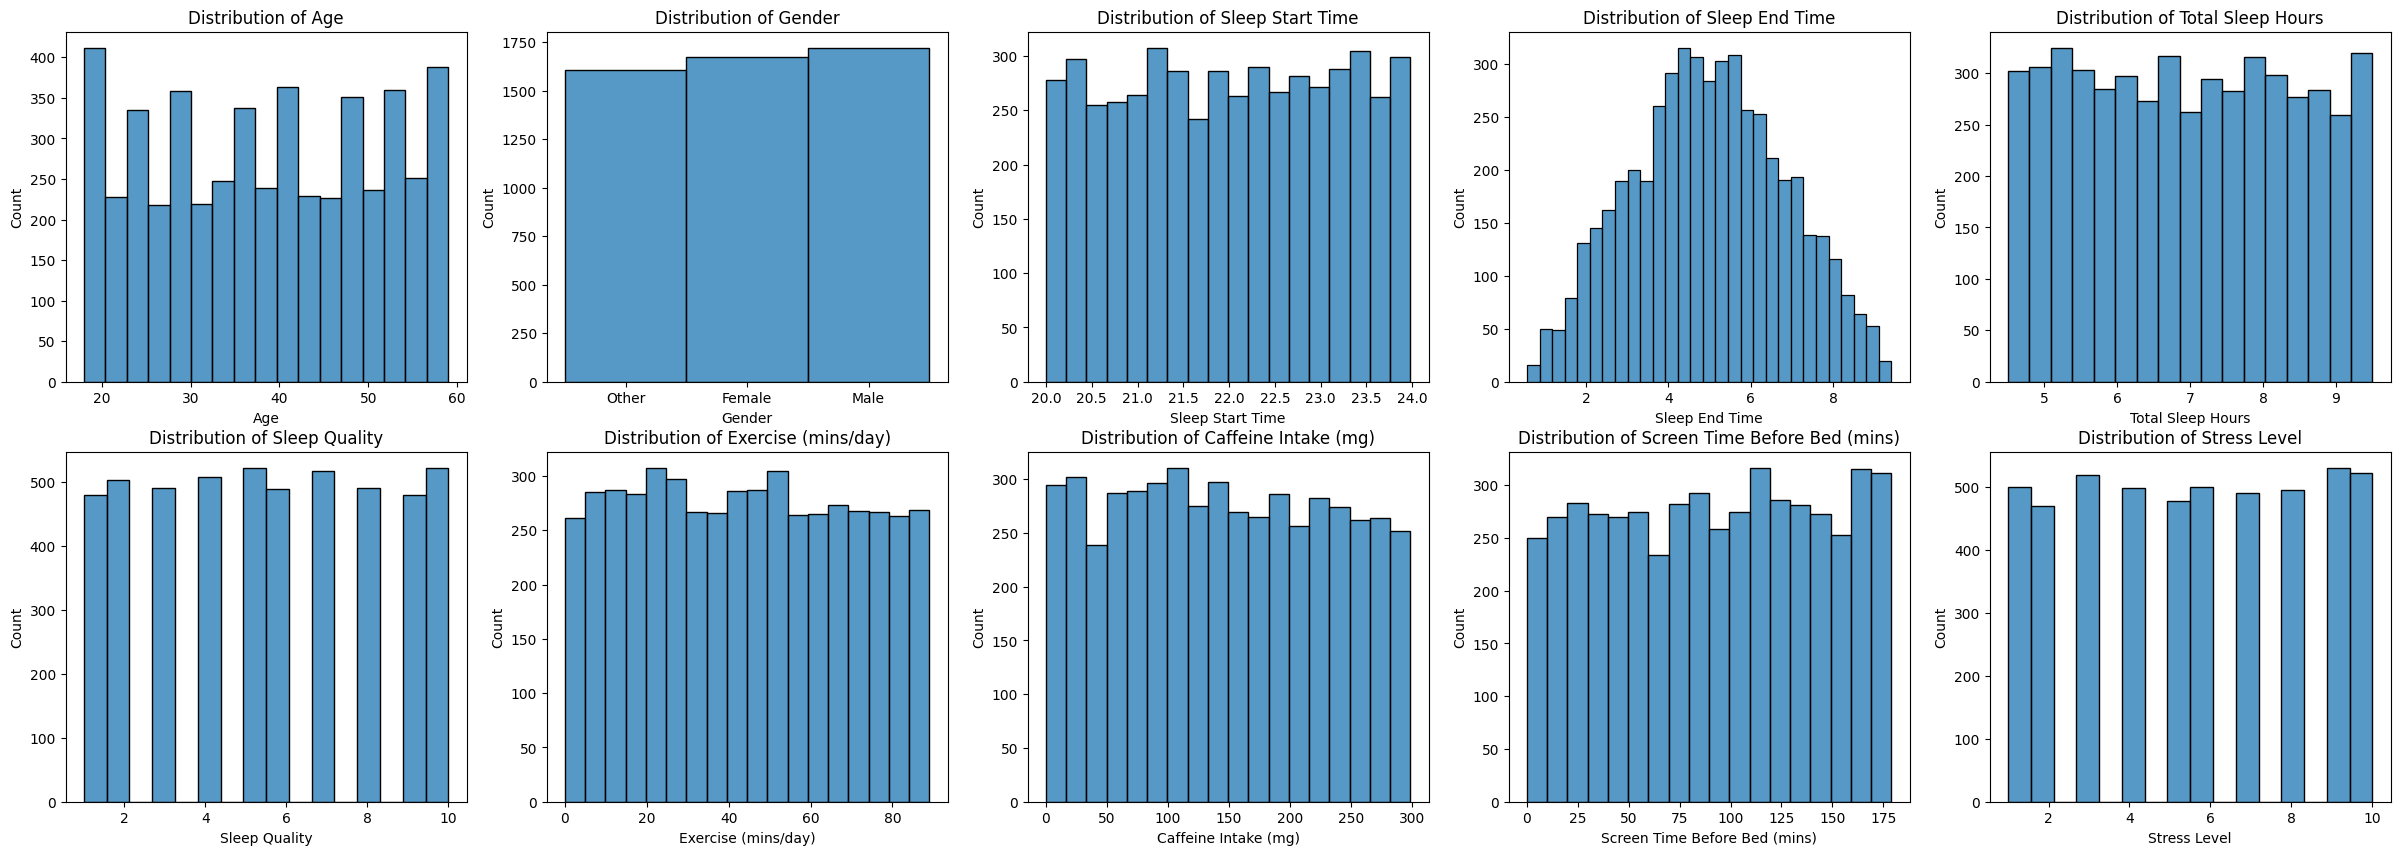

In [29]:
features = df_1.columns

fig, ax = plt.subplots(2, 5, figsize=(30, 10))

for i, feature in enumerate(features):
    sns.histplot(df_1[feature], ax=ax[i//5, i%5])
    ax[i//5, i%5].set_title(f'Distribution of {feature}')

plt.show()

Conclusions from the graph:
1. The age range is quite not diverse, as there are only data from ages 18 to 59 years old. The distribution of age is not equal as well, with some age numbers having more data than the others.
2. Data distibution on Gender, Sleep Start Time, Total sleep hours, Exercise, Caffeine Intake, and Screen Time Before Bed are quite equally distributed, this may contribute to minimizing bias in the prediction.
3. The distribution of Sleep End Time is quite unbalance, as there are more data in the range of 4 to 6. As well as distribution of Sleep Quality and Stress Level, where in certain points of value there is no data at all.

Lastly, I will check for trends in the data, to determine whether the data can be used for prediction. Specifically the trend of different features when paired with the target variable: Sleep Quality.

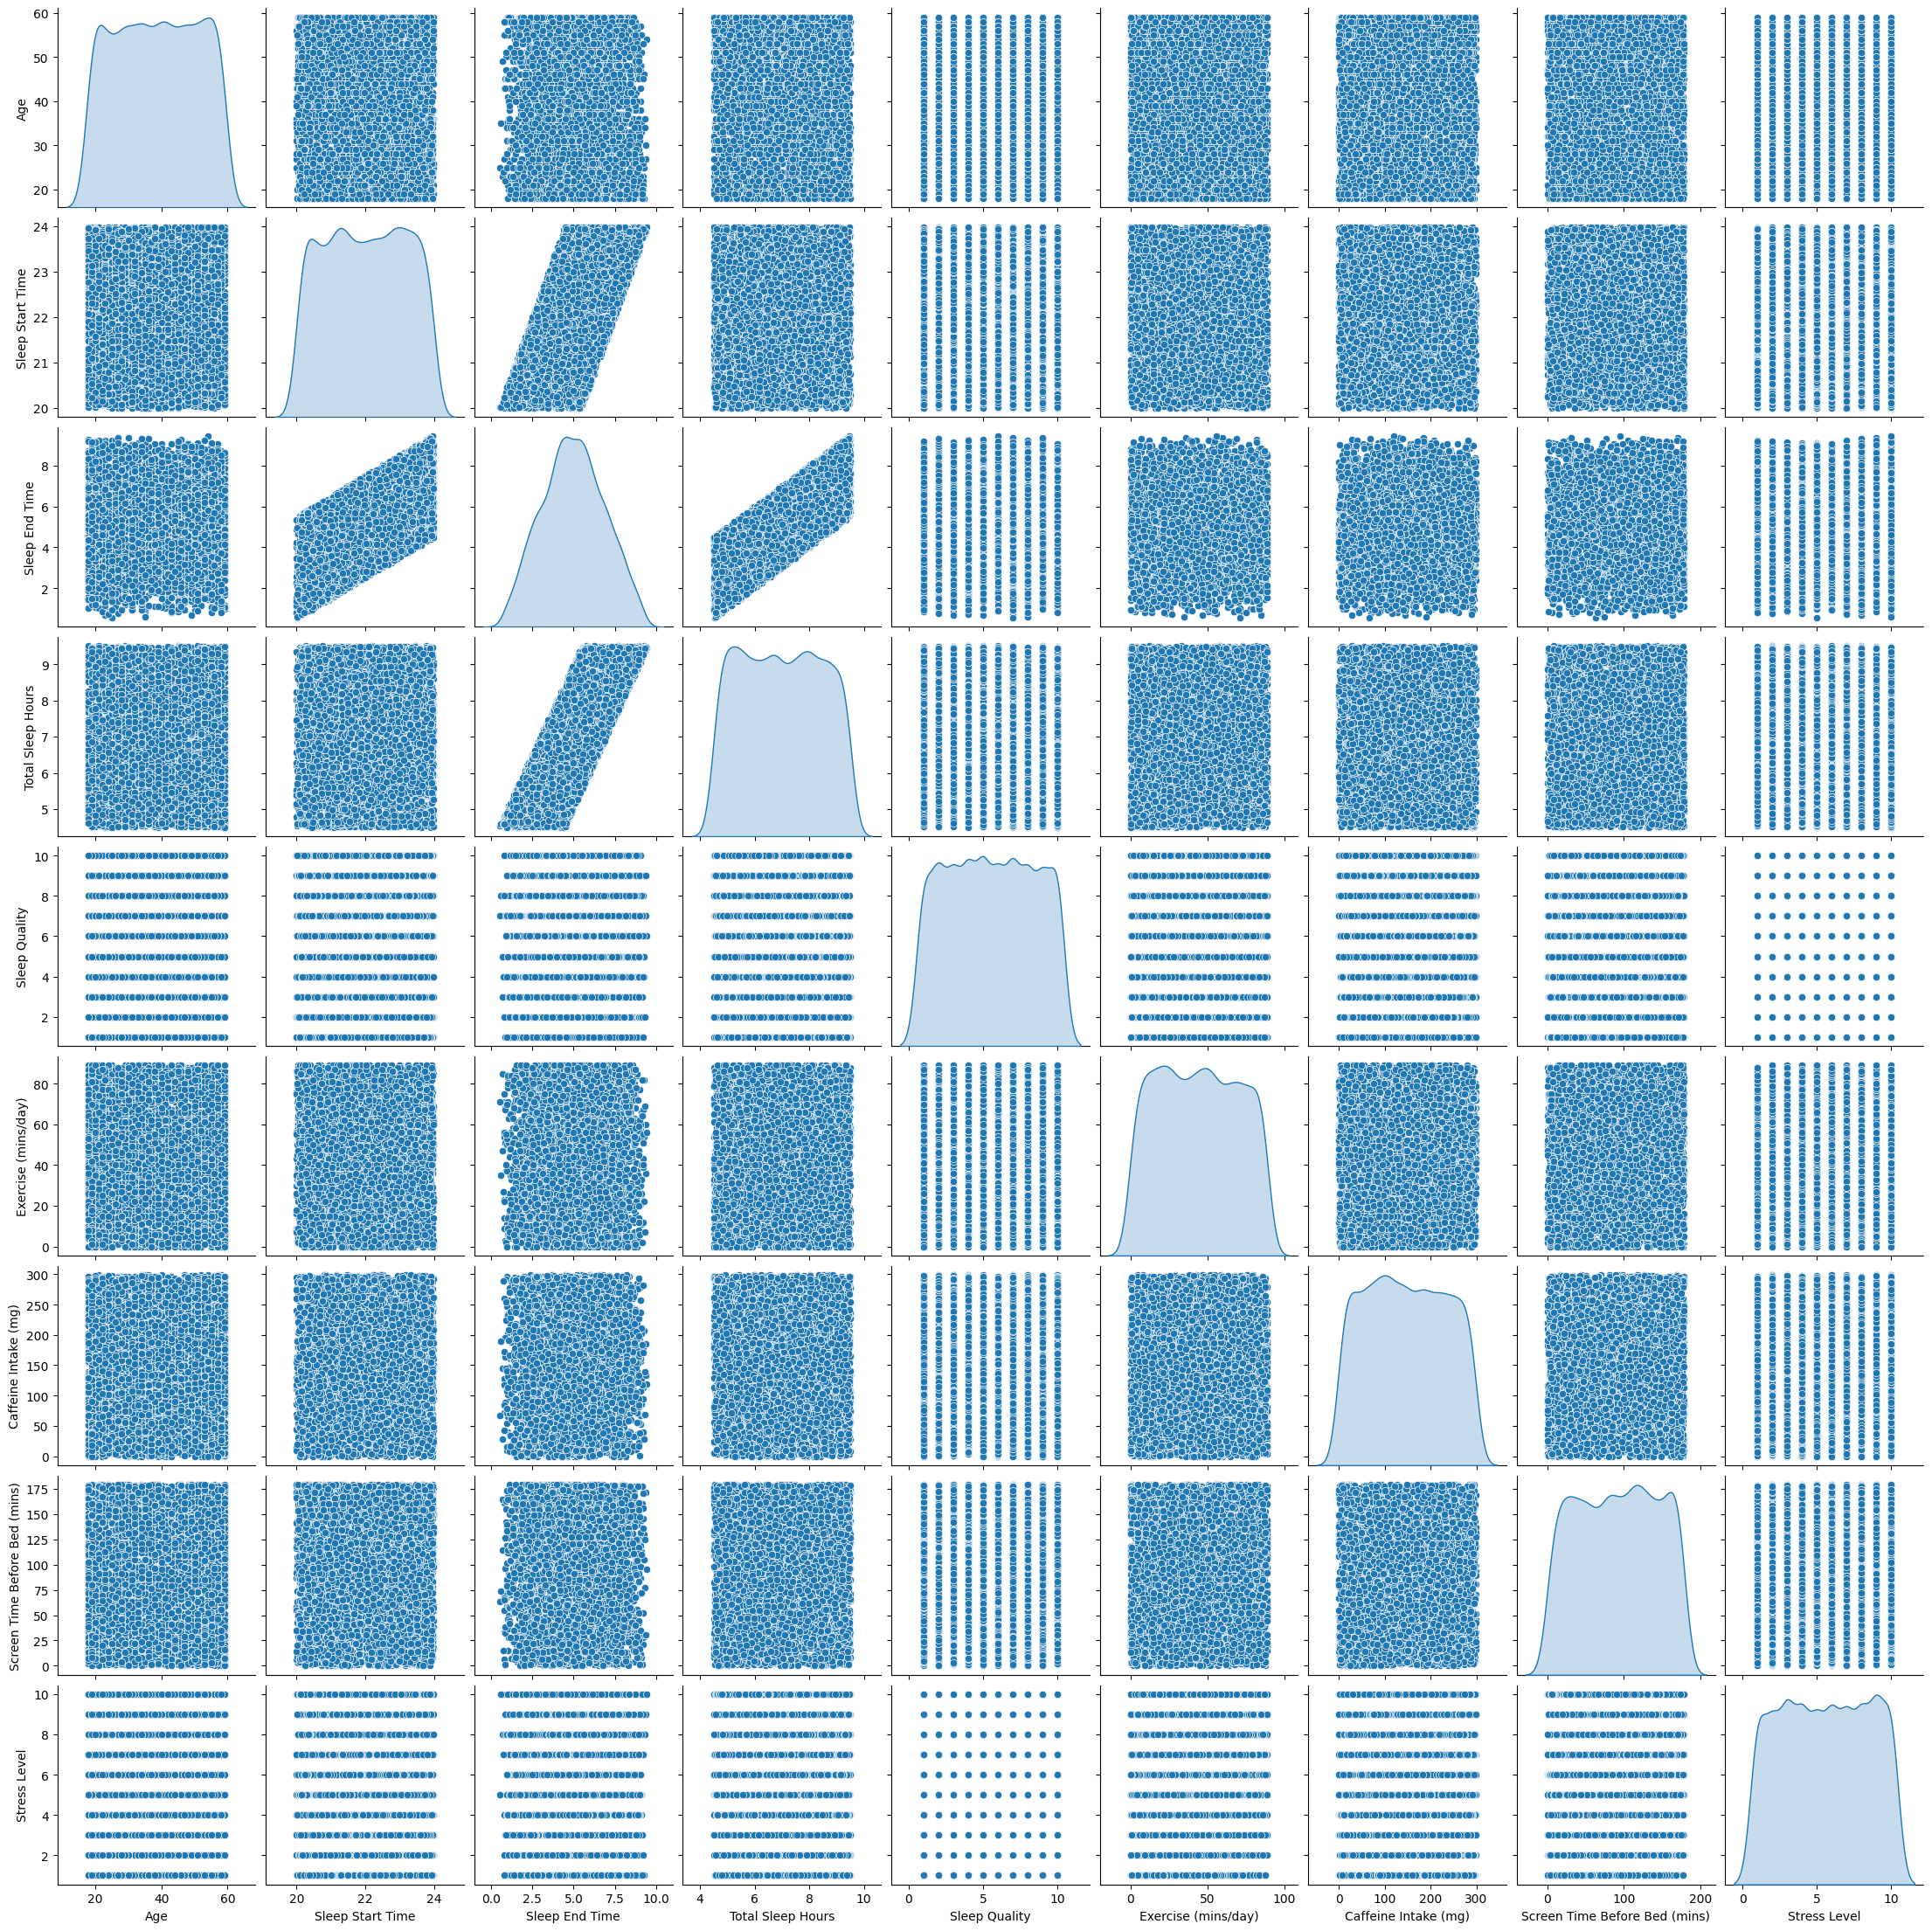

In [30]:
sns.pairplot(df_1, diag_kind='kde')

From the pairplots I can conclude that this dataset is not suitable for prediction, as each feature does not show a trend when paired with Sleep Quality. Therefore, I will not be using this dataset.

## Sleep Health and Lifestyle Dataset

In [31]:
df_2 = pd.read_csv("datasets/Sleep_health_and_lifestyle_dataset.csv")
df_2.sample(10)

Person ID  Gender  Age   Occupation  Sleep Duration  Quality of Sleep  \
78          79    Male   33       Doctor             6.0                 6   
290        291  Female   50        Nurse             6.0                 6   
77          78    Male   33       Doctor             6.0                 6   
248        249    Male   44  Salesperson             6.4                 6   
9           10    Male   29       Doctor             7.8                 7   
231        232    Male   44  Salesperson             6.3                 6   
75          76    Male   33       Doctor             6.0                 6   
265        266  Female   48        Nurse             5.9                 6   
83          84    Male   35      Teacher             6.7                 7   
240        241  Female   44      Teacher             6.5                 7   

     Physical Activity Level  Stress Level BMI Category Blood Pressure  \
78                        30             8       Normal         125/80   
290                       90             8   Overweight         140/95   
77                        30             8       Normal         125/80   
248                       45             7   Overweight         130/85   
9                         75             6       Normal         120/80   
231                       45             7   Overweight         130/85   
75                        30             8       Normal         125/80   
265                       90             8   Overweight         140/95   
83                        40             5   Overweight         128/84   
240                       45             4   Overweight         135/90   

     Heart Rate  Daily Steps Sleep Disorder  
78           72         5000            NaN  
290          75        10000    Sleep Apnea  
77           72         5000            NaN  
248          72         6000            NaN  
9            70         8000            NaN  
231          72         6000       Insomnia  
75           72         5000            NaN  
265          75        10000    Sleep Apnea  
83           70         5600            NaN  
240          65         6000       Insomnia

I am removing unecessary columns to make a more straightforward analysis.

In [32]:
df_2.drop(columns=['Person ID', 'Occupation'], inplace=True)

Here I will check for missing data, to remove the rows or replace with 'None' if possible.

In [33]:
df_2.isna().sum()

Gender                       0
Age                          0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [34]:
df_2['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

Based on the dataset description regarding the values of 'Sleep Disorder' provided by the author of this dataset on Kaggle, the values are 'Sleep Apnea', 'Insomnia', and 'None'. Therefore, the values that are detected by the system as 'Missing value' is due to the value being 'None'. In conclusion, I will be replacing the missing values with 'None'.

In [35]:
df_2.fillna('None', inplace=True)
df_2['Sleep Disorder'].sample(10)

144    Sleep Apnea
75            None
93     Sleep Apnea
122           None
20            None
297    Sleep Apnea
24            None
1             None
234       Insomnia
316           None
Name: Sleep Disorder, dtype: object

I will also be checking the diversity of the data, by analysing the data range, and distribution.

In [36]:
df_2.describe()

Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
count  374.000000      374.000000        374.000000               374.000000   
mean    42.184492        7.132086          7.312834                59.171123   
std      8.673133        0.795657          1.196956                20.830804   
min     27.000000        5.800000          4.000000                30.000000   
25%     35.250000        6.400000          6.000000                45.000000   
50%     43.000000        7.200000          7.000000                60.000000   
75%     50.000000        7.800000          8.000000                75.000000   
max     59.000000        8.500000          9.000000                90.000000   

       Stress Level  Heart Rate   Daily Steps  
count    374.000000  374.000000    374.000000  
mean       5.385027   70.165775   6816.844920  
std        1.774526    4.135676   1617.915679  
min        3.000000   65.000000   3000.000000  
25%        4.000000   68.000000   5600.000000  
50%        5.000000   70.000000   7000.000000  
75%        7.000000   72.000000   8000.000000  
max        8.000000   86.000000  10000.000000

In [37]:
df_2.shape

(374, 11)

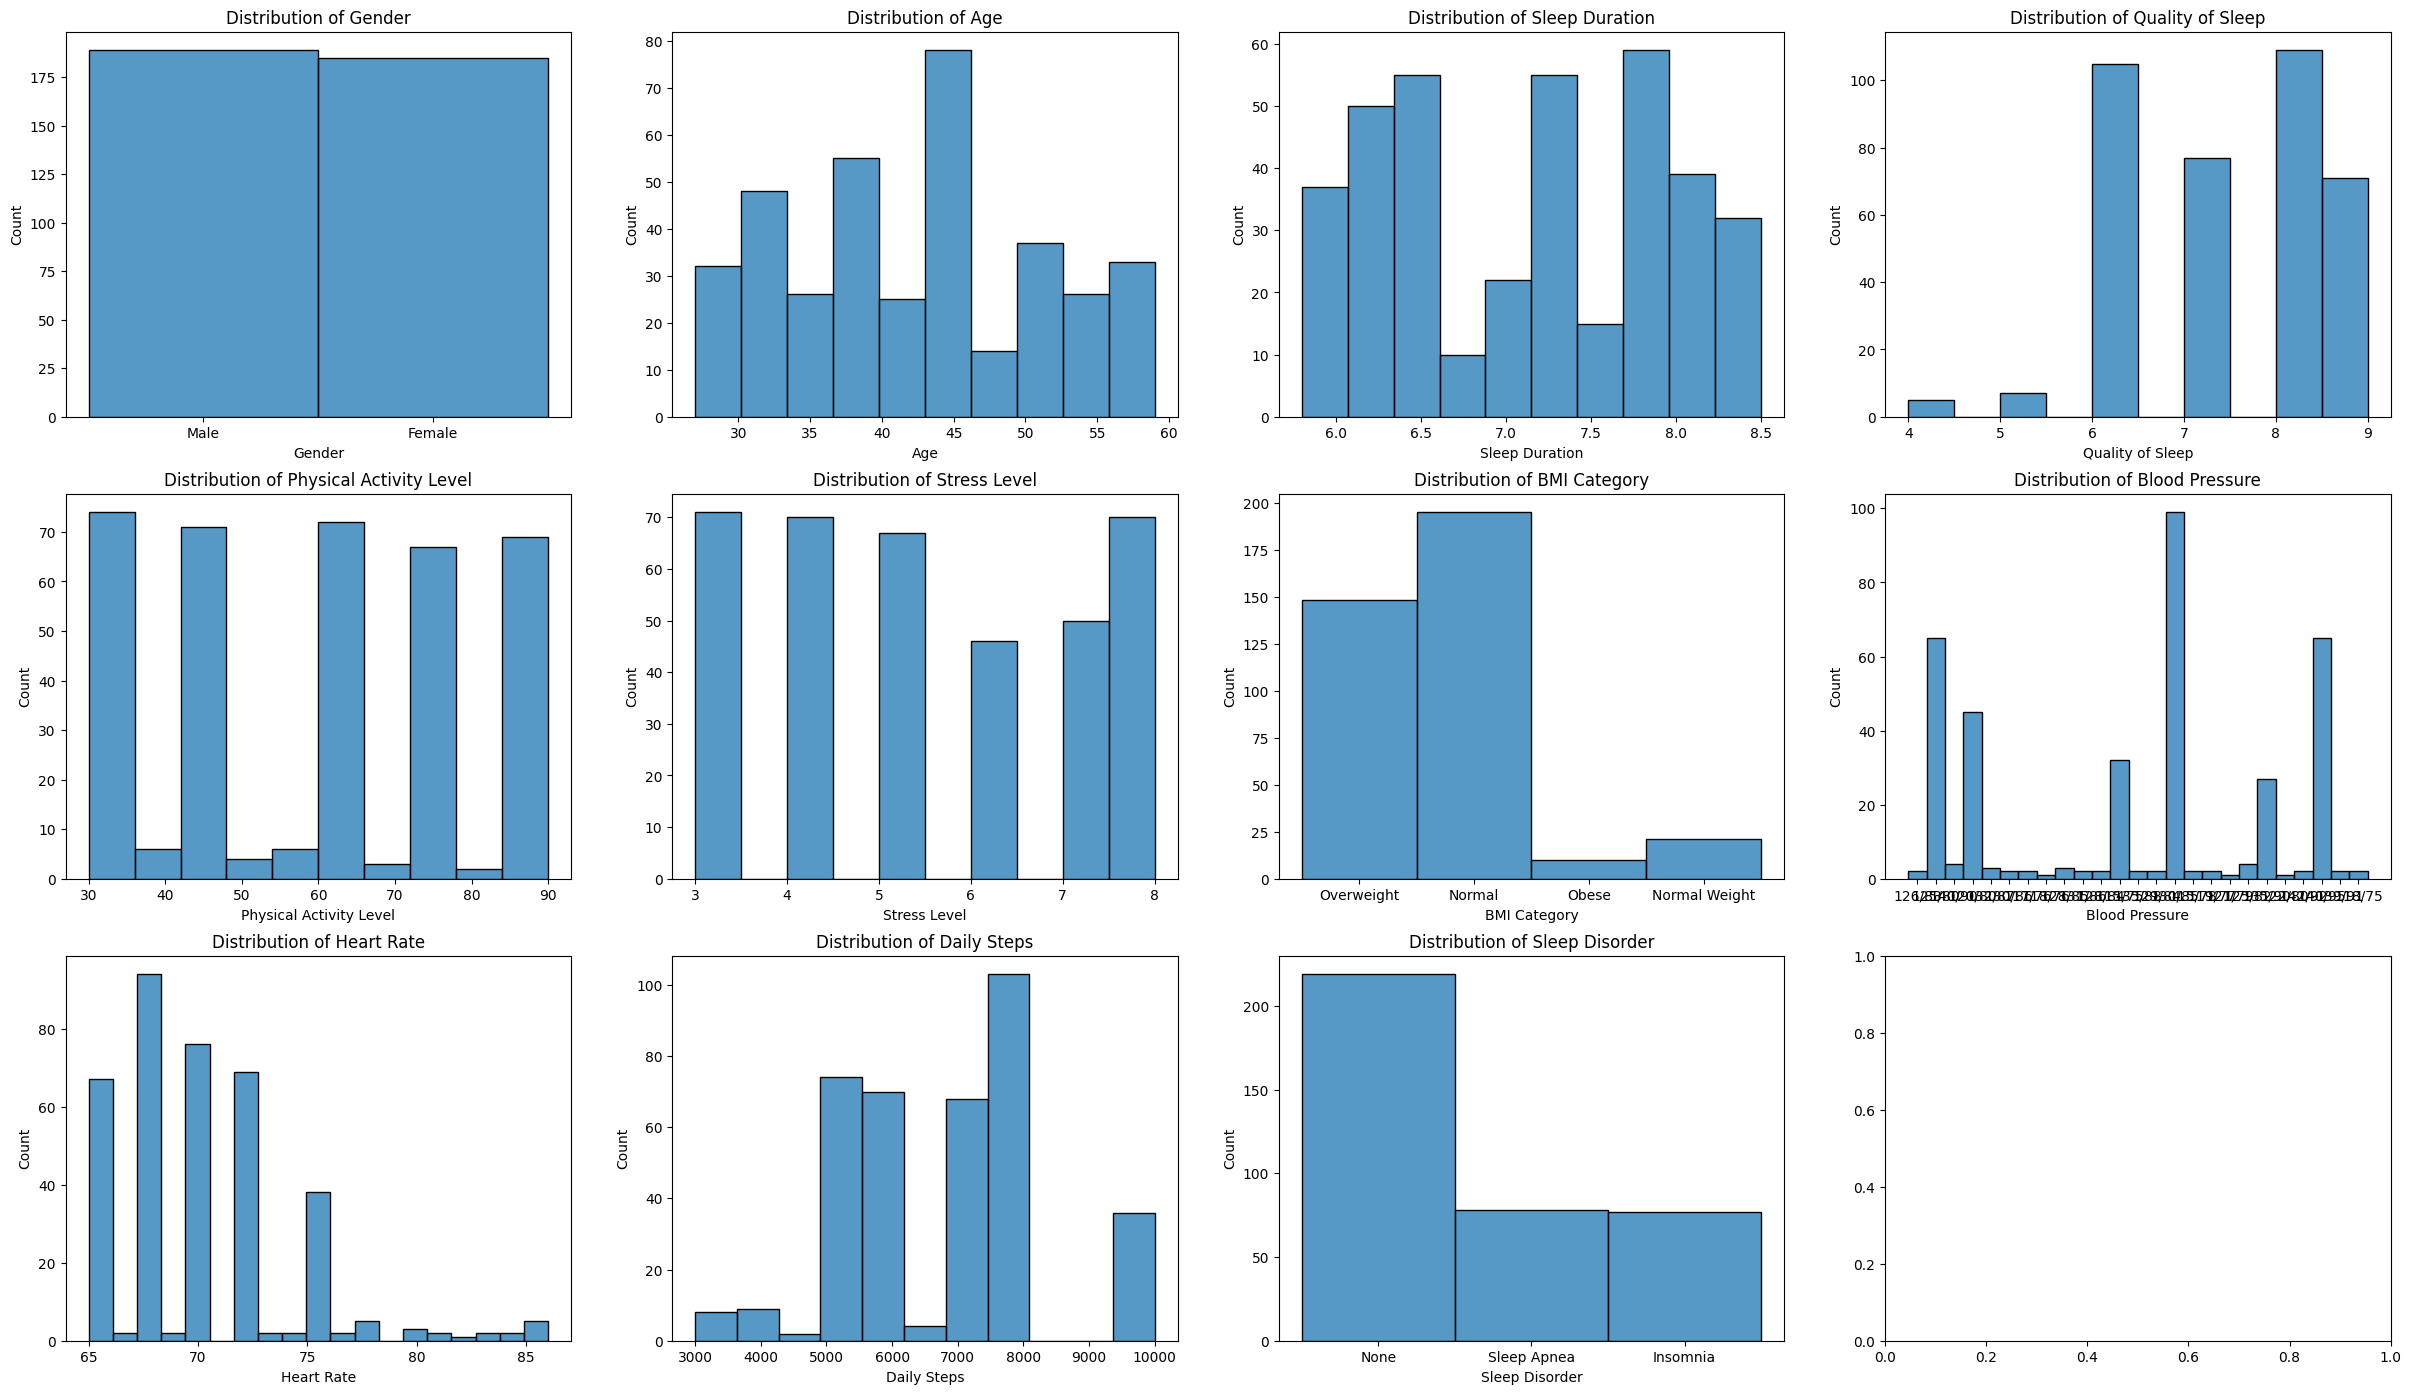

In [38]:
features = df_2.columns

fig, ax = plt.subplots(3, 4, figsize=(30, 17))

for i, feature in enumerate(features):
    sns.histplot(df_2[feature], ax=ax[i//4, i%4])
    ax[i//4, i%4].set_title(f'Distribution of {feature}')

plt.show()

Conclusions from the graph:
1. There's an equal distribution in Gender, therefore it is less likely for the prediction to be gender-biased.
2. All other features have an unequal distribution, with some features like Quality of Sleep, Stress Level, Heart Rate, and Daily Steps that do not have data on certain points within the range of the data.

I think that the uneven distribution of the values in features is due to the features having an impact on each other, so some values of a feature is clusterized to only belonging to the specific category of value of the other feature.

Lastly, I will check for trends in the data, to determine whether the data can be used for prediction. Specifically the trend of different features when paired with the target variable: Sleep Quality.

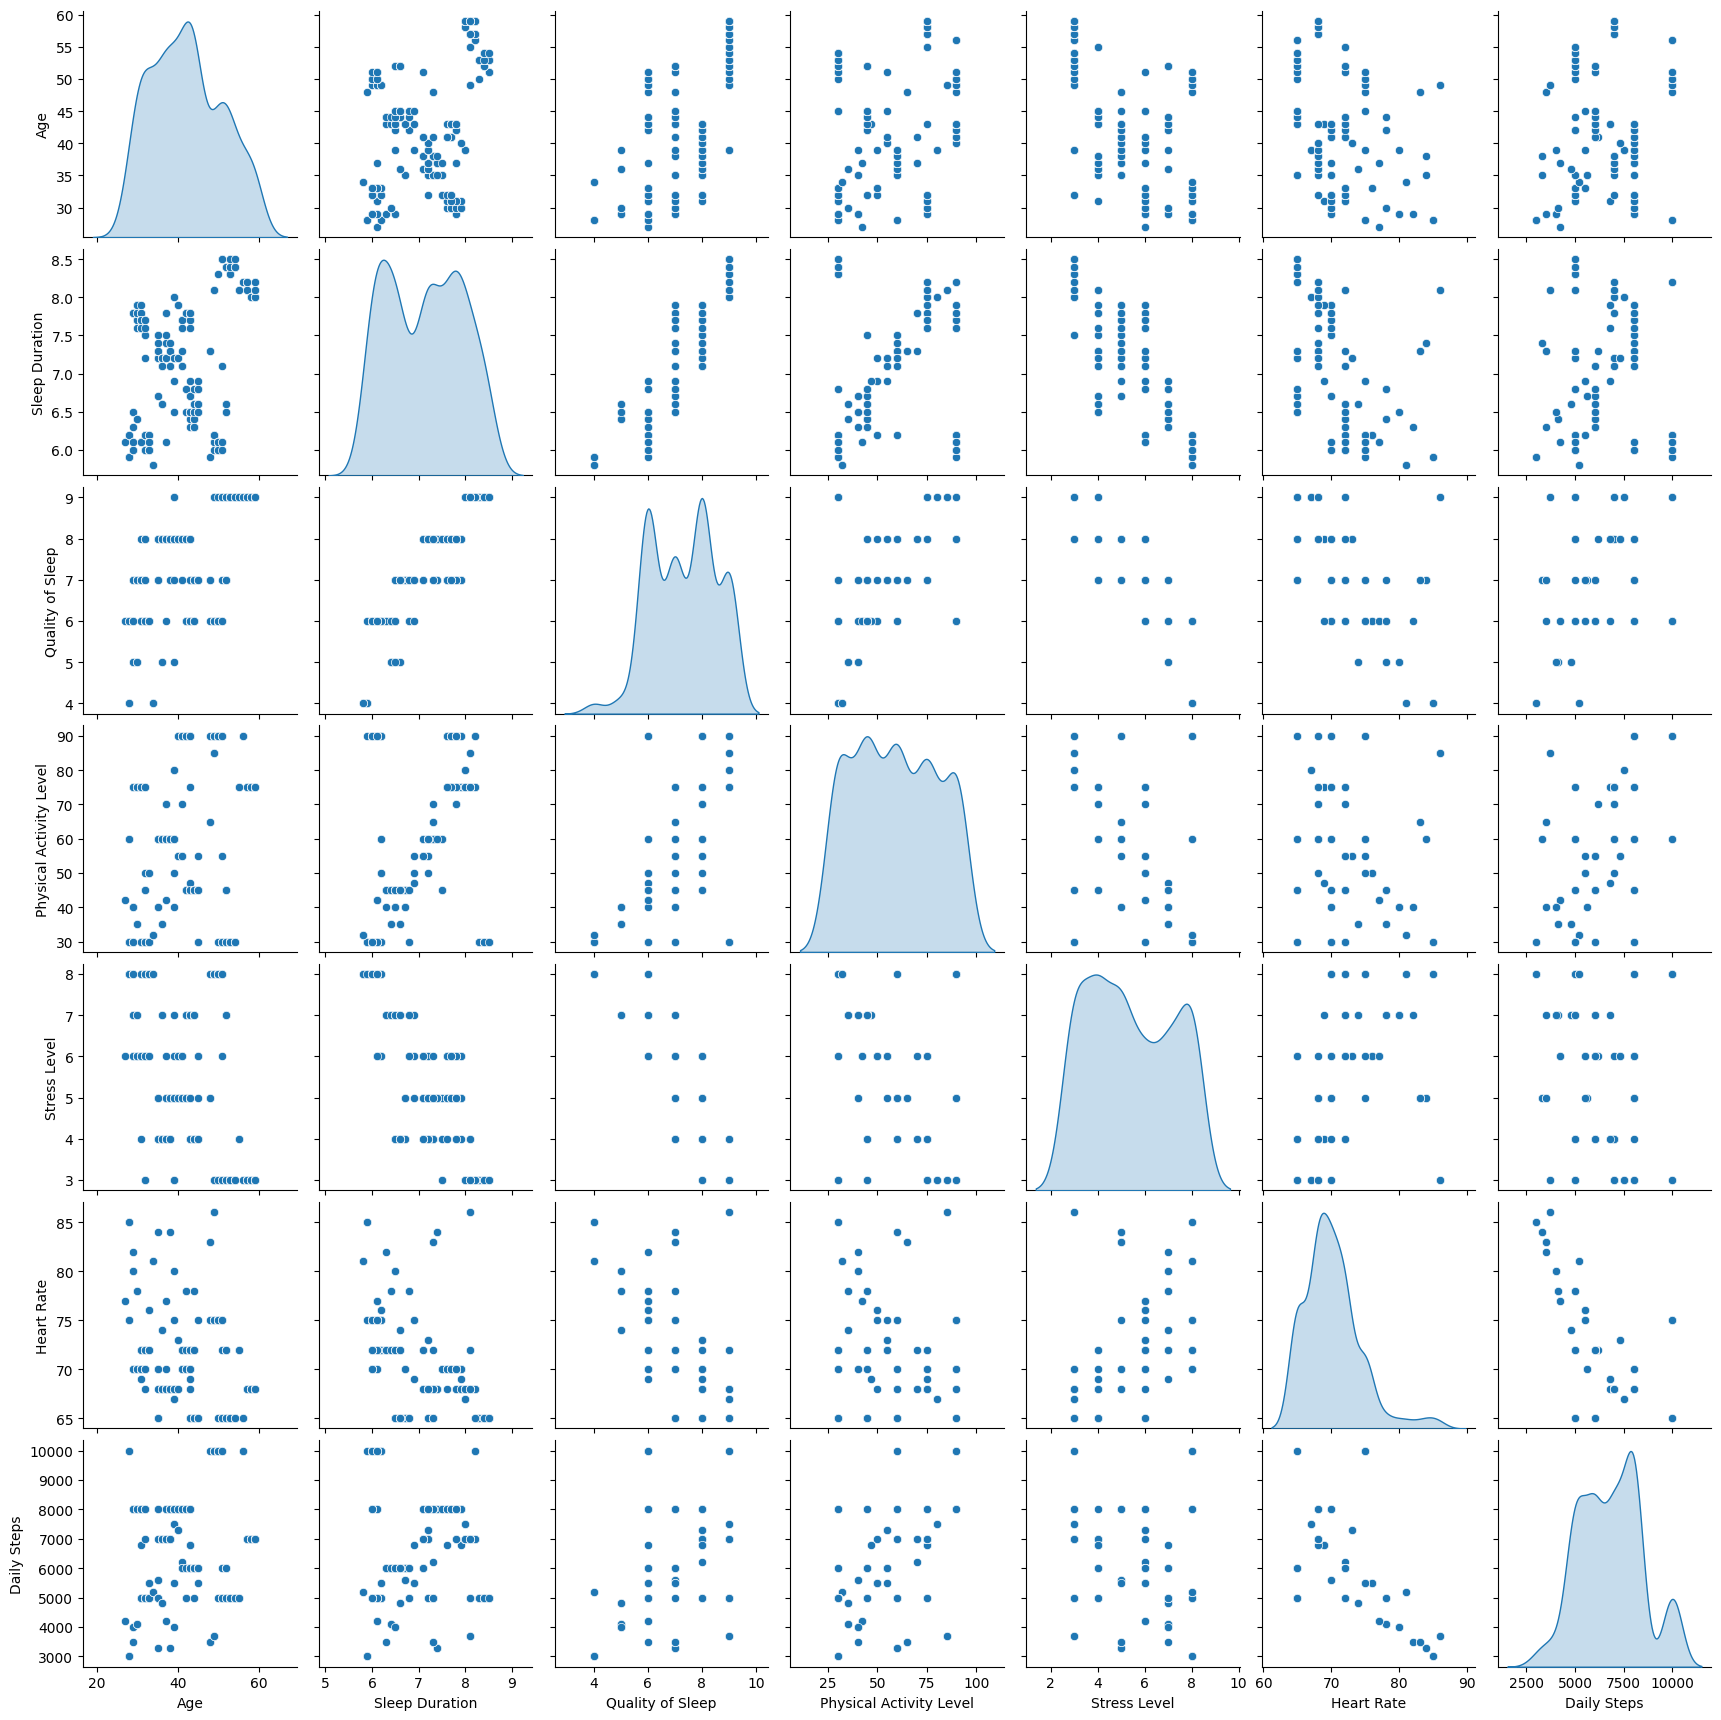

In [39]:
sns.pairplot(df_2, diag_kind='kde')

The pairplots show that there are trends in the data of features against the target variable. This means that the features and the target variable have a correlation, which is safe to say that this dataset is usable for prediction. Therefore, I will be using this 'Sleep Health and Lifestyle' dataset for the prediction.

Before continuing with value encoding and correlation mapping, I will check for duplicates in categorical colums.

In [40]:
sleep_data = df_2

columns = ['Gender', 'BMI Category', 'Sleep Disorder']

unique_values = []

for column in columns:
    unique_values.append(sleep_data[column].value_counts())

unique_values

[Gender
 Male      189
 Female    185
 Name: count, dtype: int64,
 BMI Category
 Normal           195
 Overweight       148
 Normal Weight     21
 Obese             10
 Name: count, dtype: int64,
 Sleep Disorder
 None           219
 Sleep Apnea     78
 Insomnia        77
 Name: count, dtype: int64]

There are duplicate values saved as different terms in the values of BMI Category, therefore I will convert 'Normal Weight' to 'Normal', and 'Obese' to 'Overweight'.

In [41]:
sleep_data['BMI Category'] = sleep_data['BMI Category'].str.replace('Normal Weight', 'Normal').replace('Obese', 'Overweight')
sleep_data['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    158
Name: count, dtype: int64

I will also be renaming 'Total Sleep Hours' and 'Quality of Sleep' for better readability.

In [42]:
sleep_data.rename(columns={'Total Sleep Hours':'Sleep Duration', 'Quality of Sleep':'Sleep Quality'}, inplace=True)
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Sleep Duration           374 non-null    float64
 3   Sleep Quality            374 non-null    int64  
 4   Physical Activity Level  374 non-null    int64  
 5   Stress Level             374 non-null    int64  
 6   BMI Category             374 non-null    object 
 7   Blood Pressure           374 non-null    object 
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 32.3+ KB


# Preprocessing
Before proceeding with training the model, I am going to further process the data to make it fully prepared and useful for the prediction.

Since `Gender`, `BMI Category`, `Blood Pressure`, and `Sleep Disorder` are categorical values, I will be converting them to numerical values to enable correlation checking and usability as prediction input.

In [43]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

sleep_data['Gender ID'] = encoder.fit_transform(sleep_data['Gender'])
sleep_data['BMI Category ID'] = encoder.fit_transform(sleep_data['BMI Category'])
sleep_data['Sleep Disorder ID'] = encoder.fit_transform(sleep_data['Sleep Disorder'])

sleep_data.sample(10)

Gender  Age  Sleep Duration  Sleep Quality  Physical Activity Level  \
316  Female   53             8.5              9                       30   
318  Female   53             8.4              9                       30   
75     Male   33             6.0              6                       30   
281  Female   50             6.1              6                       90   
243  Female   44             6.5              7                       45   
186  Female   43             6.7              7                       45   
27     Male   30             7.9              7                       75   
264    Male   48             7.3              7                       65   
345  Female   57             8.2              9                       75   
7      Male   29             7.8              7                       75   

     Stress Level BMI Category Blood Pressure  Heart Rate  Daily Steps  \
316             3       Normal         125/80          65         5000   
318             3       Normal         125/80          65         5000   
75              8       Normal         125/80          72         5000   
281             8   Overweight         140/95          75        10000   
243             4   Overweight         135/90          65         6000   
186             4   Overweight         135/90          65         6000   
27              6       Normal         120/80          70         8000   
264             5   Overweight         142/92          83         3500   
345             3   Overweight         140/95          68         7000   
7               6       Normal         120/80          70         8000   

    Sleep Disorder  Gender ID  BMI Category ID  Sleep Disorder ID  
316           None          0                0                  1  
318           None          0                0                  1  
75            None          1                0                  1  
281    Sleep Apnea          0                1                  2  
243       Insomnia          0                1                  0  
186       Insomnia          0                1                  0  
27            None          1                0                  1  
264       Insomnia          1                1                  0  
345    Sleep Apnea          0                1                  2  
7             None          1                0                  1

Blood Pressure values are already numerical, however the values need to be separated into systolic & diastolic values, as now it is read as a non-numerical object.

In [44]:
sleep_data['Systolic BP'] = sleep_data['Blood Pressure'].str.split('/').str[0].astype(int)
sleep_data['Diastolic BP'] = sleep_data['Blood Pressure'].str.split('/').str[1].astype(int)
sleep_data.drop(columns=['Blood Pressure'], inplace=True)
sleep_data.sample(10)

Gender  Age  Sleep Duration  Sleep Quality  Physical Activity Level  \
183    Male   42             7.8              8                       90   
192    Male   43             6.5              6                       45   
114  Female   37             7.2              8                       60   
170    Male   41             7.7              8                       90   
143  Female   38             7.1              8                       60   
176    Male   41             7.6              8                       90   
73     Male   33             6.1              6                       30   
68   Female   33             6.2              6                       50   
346  Female   57             8.2              9                       75   
200    Male   43             6.5              6                       45   

     Stress Level BMI Category  Heart Rate  Daily Steps Sleep Disorder  \
183             5       Normal          70         8000           None   
192             7   Overweight          72         6000       Insomnia   
114             4       Normal          68         7000           None   
170             5       Normal          70         8000           None   
143             4       Normal          68         7000           None   
176             5       Normal          70         8000           None   
73              8       Normal          72         5000           None   
68              6   Overweight          76         5500           None   
346             3   Overweight          68         7000    Sleep Apnea   
200             7   Overweight          72         6000       Insomnia   

     Gender ID  BMI Category ID  Sleep Disorder ID  Systolic BP  Diastolic BP  
183          1                0                  1          130            85  
192          1                1                  0          130            85  
114          0                0                  1          115            75  
170          1                0                  1          130            85  
143          0                0                  1          115            75  
176          1                0                  1          130            85  
73           1                0                  1          125            80  
68           0                1                  1          128            85  
346          0                1                  2          140            95  
200          1                1                  0          130            85

# Features Selection
The dataset has been thoroughly cleaned and prepared, so now I can map the correlations.

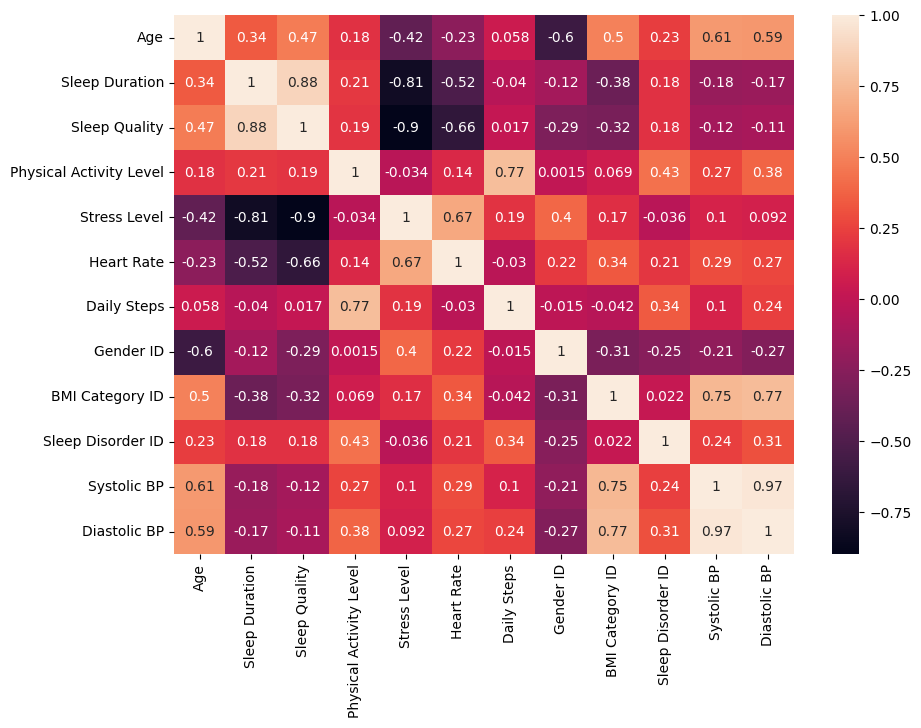

In [45]:
sleep_data_numerical = sleep_data.drop(columns=['Gender', 'BMI Category', 'Sleep Disorder'])

correlations = sleep_data_numerical.corr()
plt.figure(figsize=(10,7))
plot = sns.heatmap(correlations, annot=True)

### Selection Condition
Correlation values closer to 1 means the feature and target variable have a positive correlation, and values closer to -1 means the feature and target variable have a negative correlation. 1 is perfect positive correlation and -1 is perfect negative correlation. Values closer to 0 means the feature and target variable have a low correlation.

For now, I will only select features that have correlation values closer to 1 or -1.

In [46]:
features = ['Age', 'Sleep Duration', 'Stress Level', 'Heart Rate']
target = 'Sleep Quality'

X = sleep_data[features]
y = sleep_data[target]

# Train/test Splitting

I am splitting the data into train and test so I can evaluate the model based on the error values between the prediction and actual values.

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 374 observations, of which 299 are now in the train set, and 75 in the test set.


# Modeling with Linear Regression

For the first try, I am going to use linear regression for the prediction, as I think this model will fit with the sleep dataset, which has a trend and the target variable which is continuous.

In [48]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
result = model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("R²:", score)

R²: 0.885437310320728


# Inferencing

Below is an example of the prediction based on the user inputs.

In [49]:
data = {
    'Age': 18,
    'Sleep Duration': 8,
    'Stress Level': 1,
    'Heart Rate': 72
}

X_inference = pd.DataFrame([data])
prediction = model.predict(X_inference).round(2)
result = f'Sleep Quality Score: {prediction}'.replace('[', '').replace(']', '')
print(result)

Sleep Quality Score: 8.63


# Evaluation

Here, I am evaluating the model by seeing the error values, and visualizing how far the prediction result is from the truth.

In [50]:
predictions = model.predict(X_test)
prediction_overview = pd.DataFrame()
prediction_overview["truth"] = y_test
prediction_overview["prediction"] = predictions
prediction_overview["error"] = prediction_overview["truth"] - prediction_overview["prediction"]
prediction_overview["error"] = abs(prediction_overview["error"]).round(2)
prediction_overview = prediction_overview.reset_index(drop=True)
prediction_overview

truth  prediction  error
0       8    7.473190   0.53
1       8    7.833387   0.17
2       8    7.903652   0.10
3       7    7.380693   0.38
4       6    5.626054   0.37
..    ...         ...    ...
70      6    6.430075   0.43
71      6    5.712338   0.29
72      4    5.132874   1.13
73      8    7.701621   0.30
74      7    7.450959   0.45

[75 rows x 3 columns]

<Axes: xlabel='Predictions', ylabel='Truth'>

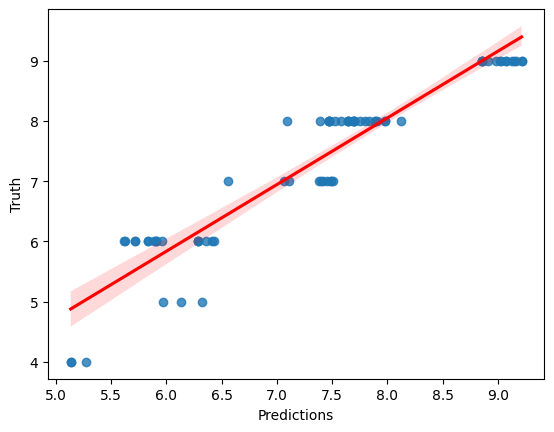

In [51]:
plot = sns.regplot(y=y_test.values.flatten(), x=predictions.flatten(), line_kws={"color": "r"})
plot.set(xlabel="Predictions", ylabel="Truth")
plot

The plot shows some groups of values, so there might be clusters in the data. With each cluster there are values that are predicted accurately, however there are also prediction values that are off. There are also some noticeable outliers in lower values are and larger values area.

I am also checking the maximum error and root mean squared error to get a more meaningful indication for the prediction.

In [52]:
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error
import math

me = max_error(y_test, predictions)
print("Max error:", round(me, 2))

mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
print("Root mean squared error:", round(rmse, 2))

Max error: 1.32
Root mean squared error: 0.45


The max error and RMSE values indicate that the model will on average predict off from the truth by 0.38, and may occasionally predict 1.09 off from the truth.

# Explaining the Model

To explain the model by analysing the importance and impact of each feature in the prediction, I will be using the shap values of the features and plot them on a beeswarm plot.

In [53]:
def model_predict(X):
    return model.predict(X)

explainer = shap.Explainer(model_predict, X_train)
shap_values = explainer(X_test)

ExactExplainer explainer: 76it [00:15,  4.89it/s]                         


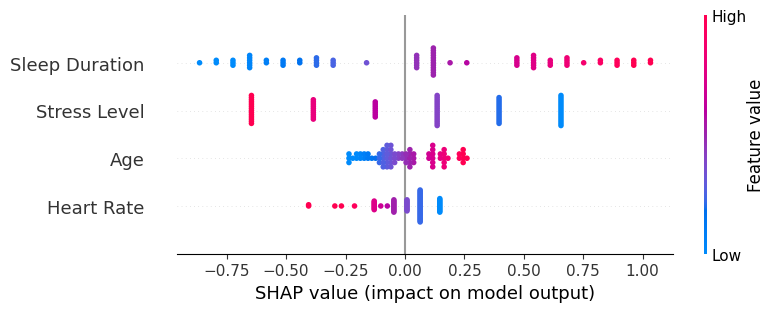

In [54]:
shap.plots.beeswarm(shap_values)

The plot is showing:
1. Lower Sleep Duration and Age values have a negative impact on the prediction outcome, and higher values of those have a positive impact on the prediction outcome.
2. Lower Stress Level and Heart Rate values have a positive impact on the prediction outcome, and high values of those have a negative impact on the prediction outcome.
3. Sleep Duration and Stress Level have quite large positive and negative impacts towards the prediction outcome.
4. Age and Heart Rate have lower positive and negative impacts towards the prediction outcome.

# Conclusion
From the evaluation of the model, my conclusion is that the prediction itself is quite accurate using linear regression, as the prediction errors are not that big shown by the Maximum Error value and Root Mean Squared Error value. Moreover, most of the predicted values are close to the line in the regression plot. However, as the visualization also shows presence of clusters in the data, it is assumed that using a k-NN model for prediction might also work.